Importing the Dependencies


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Loading Data and Processing of data


In [ ]:
# loading the dataset to pandas DataFrame
df = pd.read_csv('train.csv')# number of rows and columns


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# printing the first 5 rows of the dataframe
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#printing the entire dataset
print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# number of rows and columns
df.shape

(614, 13)

In [ ]:
# statistical measures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# number of missing values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

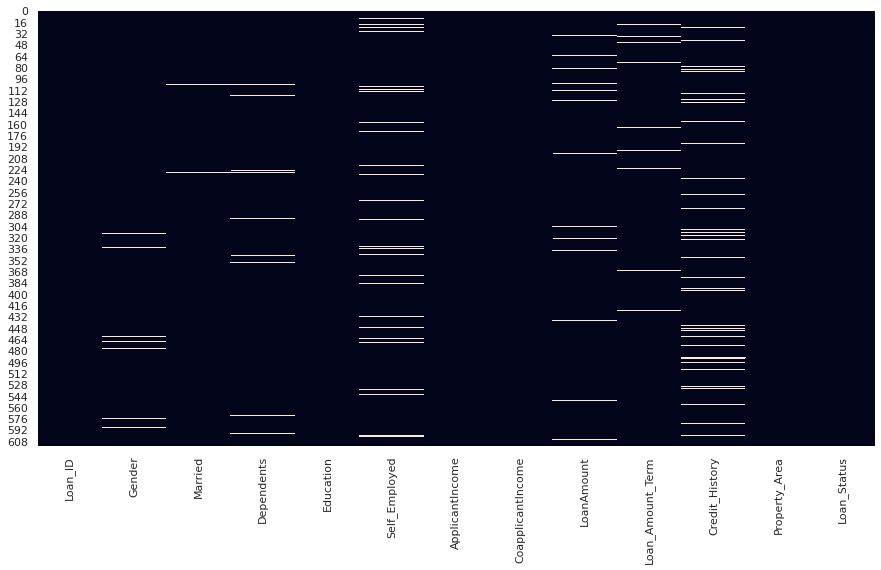

In [ ]:
#visualize the missing null values using heat map
sns.heatmap(df.isnull(),cbar=False)

In [ ]:
#count the missing values for each feature
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#To drop the missing values
df=df.dropna()

In [ ]:
#count the missing values for each feature
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

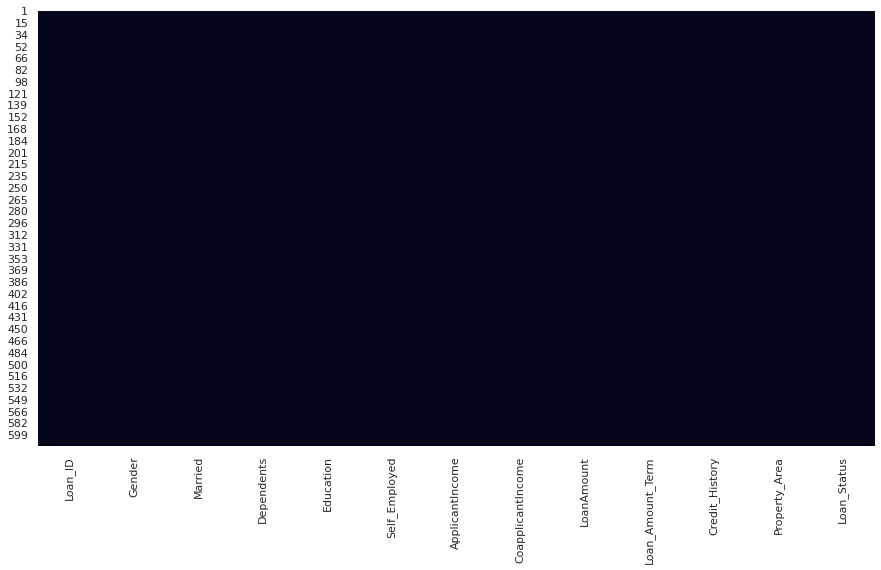

In [ ]:
sns.heatmap(df.isnull(),cbar=False)

In [ ]:
# label encoding
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [ ]:
# Dependent column values
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [ ]:
# replacing the value of 3+ to 4
df = df.replace(to_replace='3+', value=4)

In [ ]:
# Dependent column values
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [ ]:
# convert categorical columns to numerical values
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

**Data Visualization**

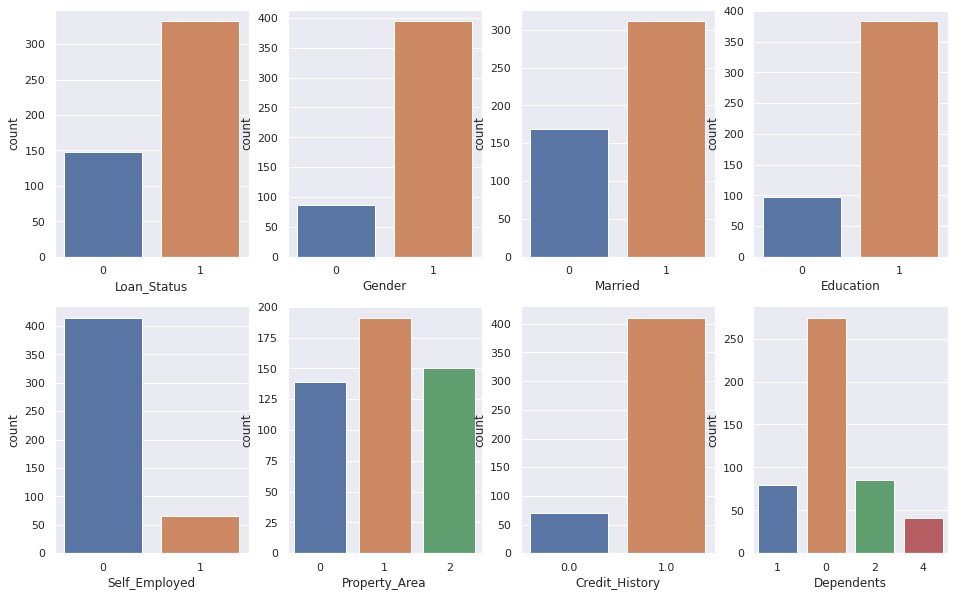

In [ ]:
fig,ax=plt.subplots(2,4,figsize=(16,10))
sns.countplot(x='Loan_Status',data=df,ax=ax[0][0])
sns.countplot(x='Gender',data=df,ax=ax[0][1])
sns.countplot(x='Married',data=df,ax=ax[0][2])
sns.countplot(x='Education',data=df,ax=ax[0][3])
sns.countplot(x='Self_Employed',data=df,ax=ax[1][0])
sns.countplot(x='Property_Area',data=df,ax=ax[1][1])
sns.countplot(x='Credit_History',data=df,ax=ax[1][2])
sns.countplot(x='Dependents',data=df,ax=ax[1][3])


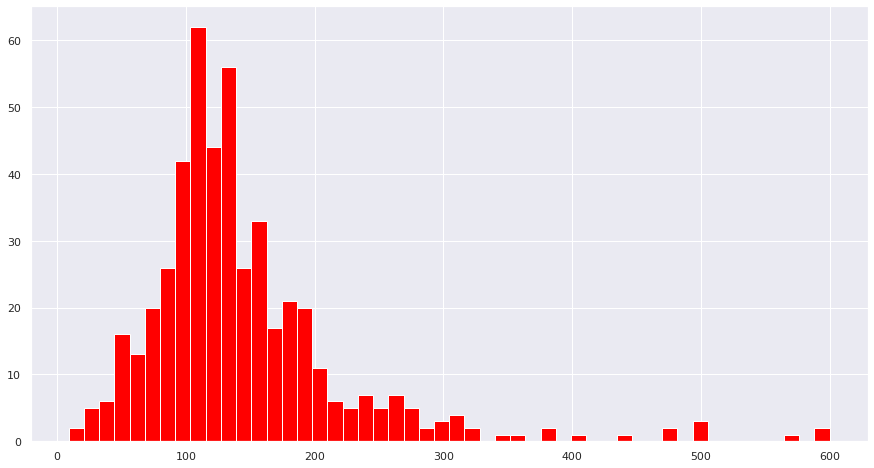

In [ ]:
df["LoanAmount"].hist(color='red',bins=50)

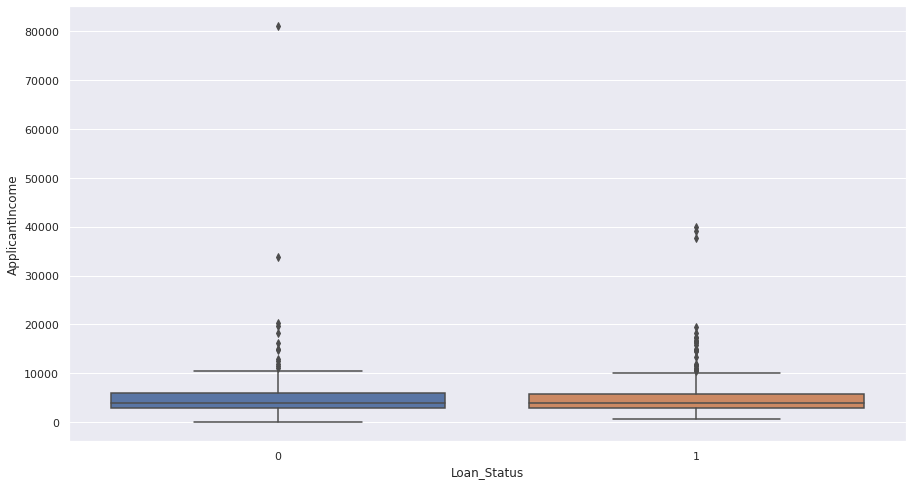

In [ ]:
sns.boxplot(x="Loan_Status",y="ApplicantIncome",data=df)

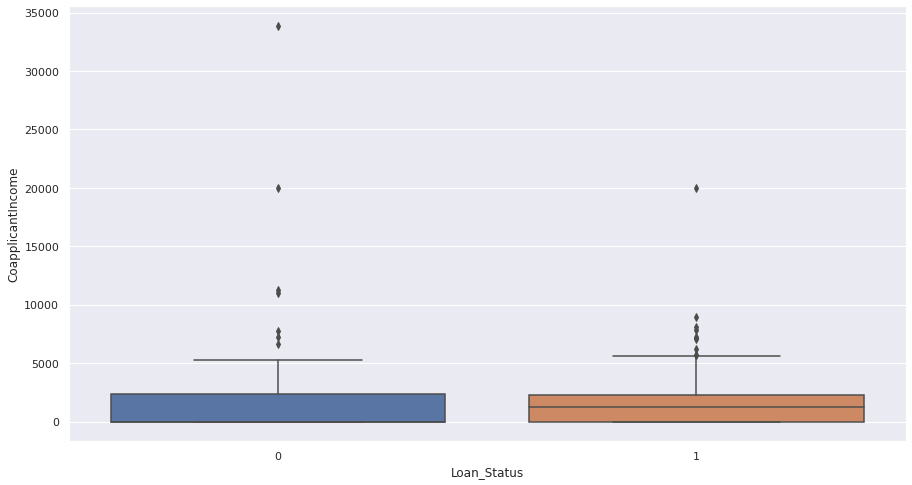

In [ ]:
sns.boxplot(x="Loan_Status",y="CoapplicantIncome",data=df)

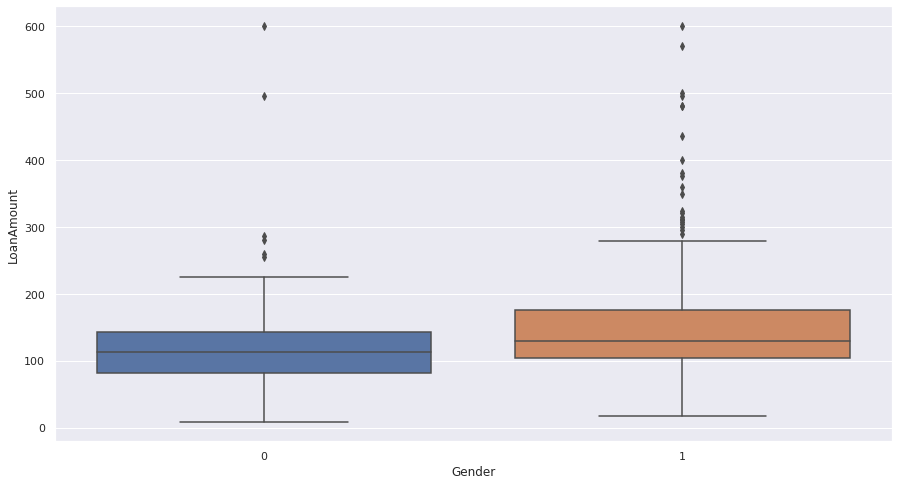

In [ ]:
sns.boxplot(x="Gender",y="LoanAmount",data=df)

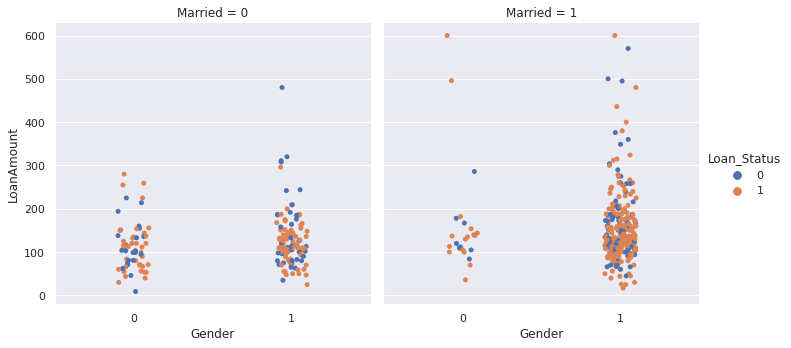

In [ ]:
sns.catplot(x="Gender",y="LoanAmount",data=df,hue="Loan_Status",col="Married")

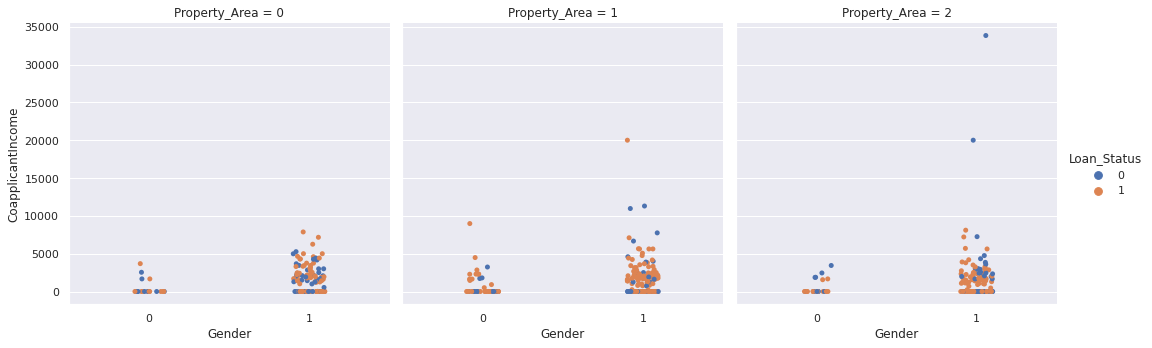

In [ ]:
sns.catplot(x="Gender",y="CoapplicantIncome",data=df,hue="Loan_Status",col="Property_Area")

<function matplotlib.pyplot.show>

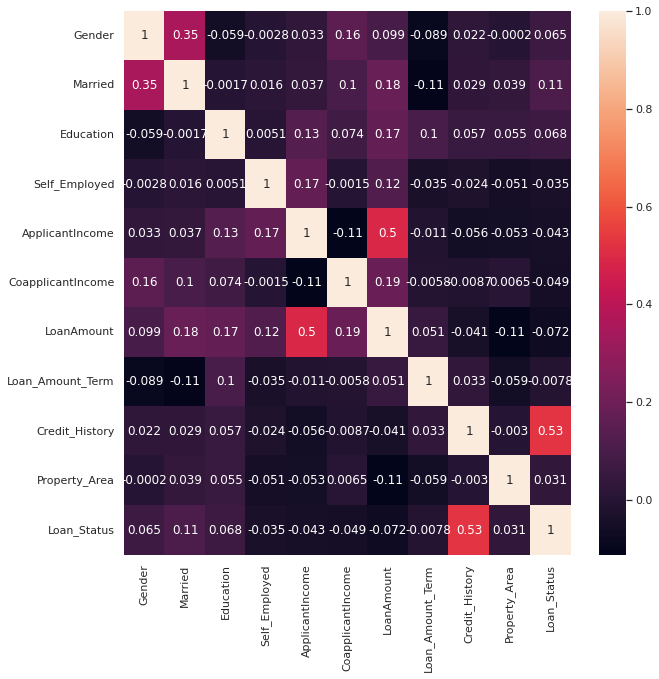

In [ ]:
#Correlation matrix
plt.figure(figsize=(10,10))
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show

In [ ]:
# separating the data and label
X =df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = df['Loan_Status']

In [ ]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

**Train Test Split**

In [ ]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression()  
classifier.fit(X_train, Y_train)  

LogisticRegression()

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [ ]:
accuracy=accuracy_score(y_pred,Y_test)*100
print("The accuracy of the model is:",accuracy)

The accuracy of the model is: 83.33333333333334
